<a href="https://colab.research.google.com/github/NidaBoy/computational-static-physics/blob/main/fire_florests_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daniel Barreto Torres- 2018432952

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parte 1

In [ ]:
def inicializa_floresta(L):
    floresta = np.zeros((L, L), dtype=int)
    return floresta

In [ ]:
def crescimento(floresta, p):
    L = floresta.shape[0]
    for i in range(L):
        for j in range(L):
            if floresta[i, j] == 0:
                if np.random.rand() <= p:
                    floresta[i, j] = 1

In [ ]:
def raio(floresta, f):

    L = floresta.shape[0]
    if np.random.rand() < f:
        i, j = np.random.randint(0, L, size=2)
        if floresta[i, j] == 1:
            return incendiar(floresta, i, j)
    return []

In [ ]:
def incendiar(floresta, i, j):
    L = floresta.shape[0]
    pilha = [(i, j)]
    queimadas = []

    while pilha:
        x, y = pilha.pop()
        floresta[x, y] = 0  # Queima a árvore
        queimadas.append((x, y))
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx = x + dx
            ny = y + dy
            if 0 <= nx < L and 0 <= ny < L and floresta[nx, ny] == 1:
                pilha.append((nx, ny))

    return queimadas

In [ ]:
def visualizar(floresta, queimadas=None, passo=None, max_passos=None):
    L = floresta.shape[0]
    x, y = np.meshgrid(range(L), range(L))
    x = x.flatten()
    y = y.flatten()

    cols = 5
    rows = (max_passos + cols - 1) // cols  # Divide e arredonda para cima

    plt.subplot(rows, cols, passo + 1)
    plt.scatter(y, x, c=floresta.flatten(), cmap='Greens', marker='^')
    if queimadas:
        queimadas = np.array(queimadas)
        plt.scatter(queimadas[:, 0], queimadas[:, 1], color='red', marker='^')
    plt.title(f'Passo {passo + 1}', fontsize=10)
    plt.grid(True, color='black')
    plt.xlabel('Coluna')
    plt.ylabel('Linha')
    plt.xticks(np.arange(0, L, 1))
    plt.yticks(np.arange(0, L, 1))

In [ ]:
def simular1a(L, T, p, f):
    floresta = inicializa_floresta(L)

    plt.figure(figsize=(25, (T // 5 + 1) * 3))  # Ajuste a altura para evitar sobreposição
    for t in range(T):
        crescimento(floresta, p)
        queimadas = raio(floresta, f)
        visualizar(floresta, queimadas=queimadas, passo=t, max_passos=T)
    plt.tight_layout()
    plt.show()

# Questão 1 A) B)

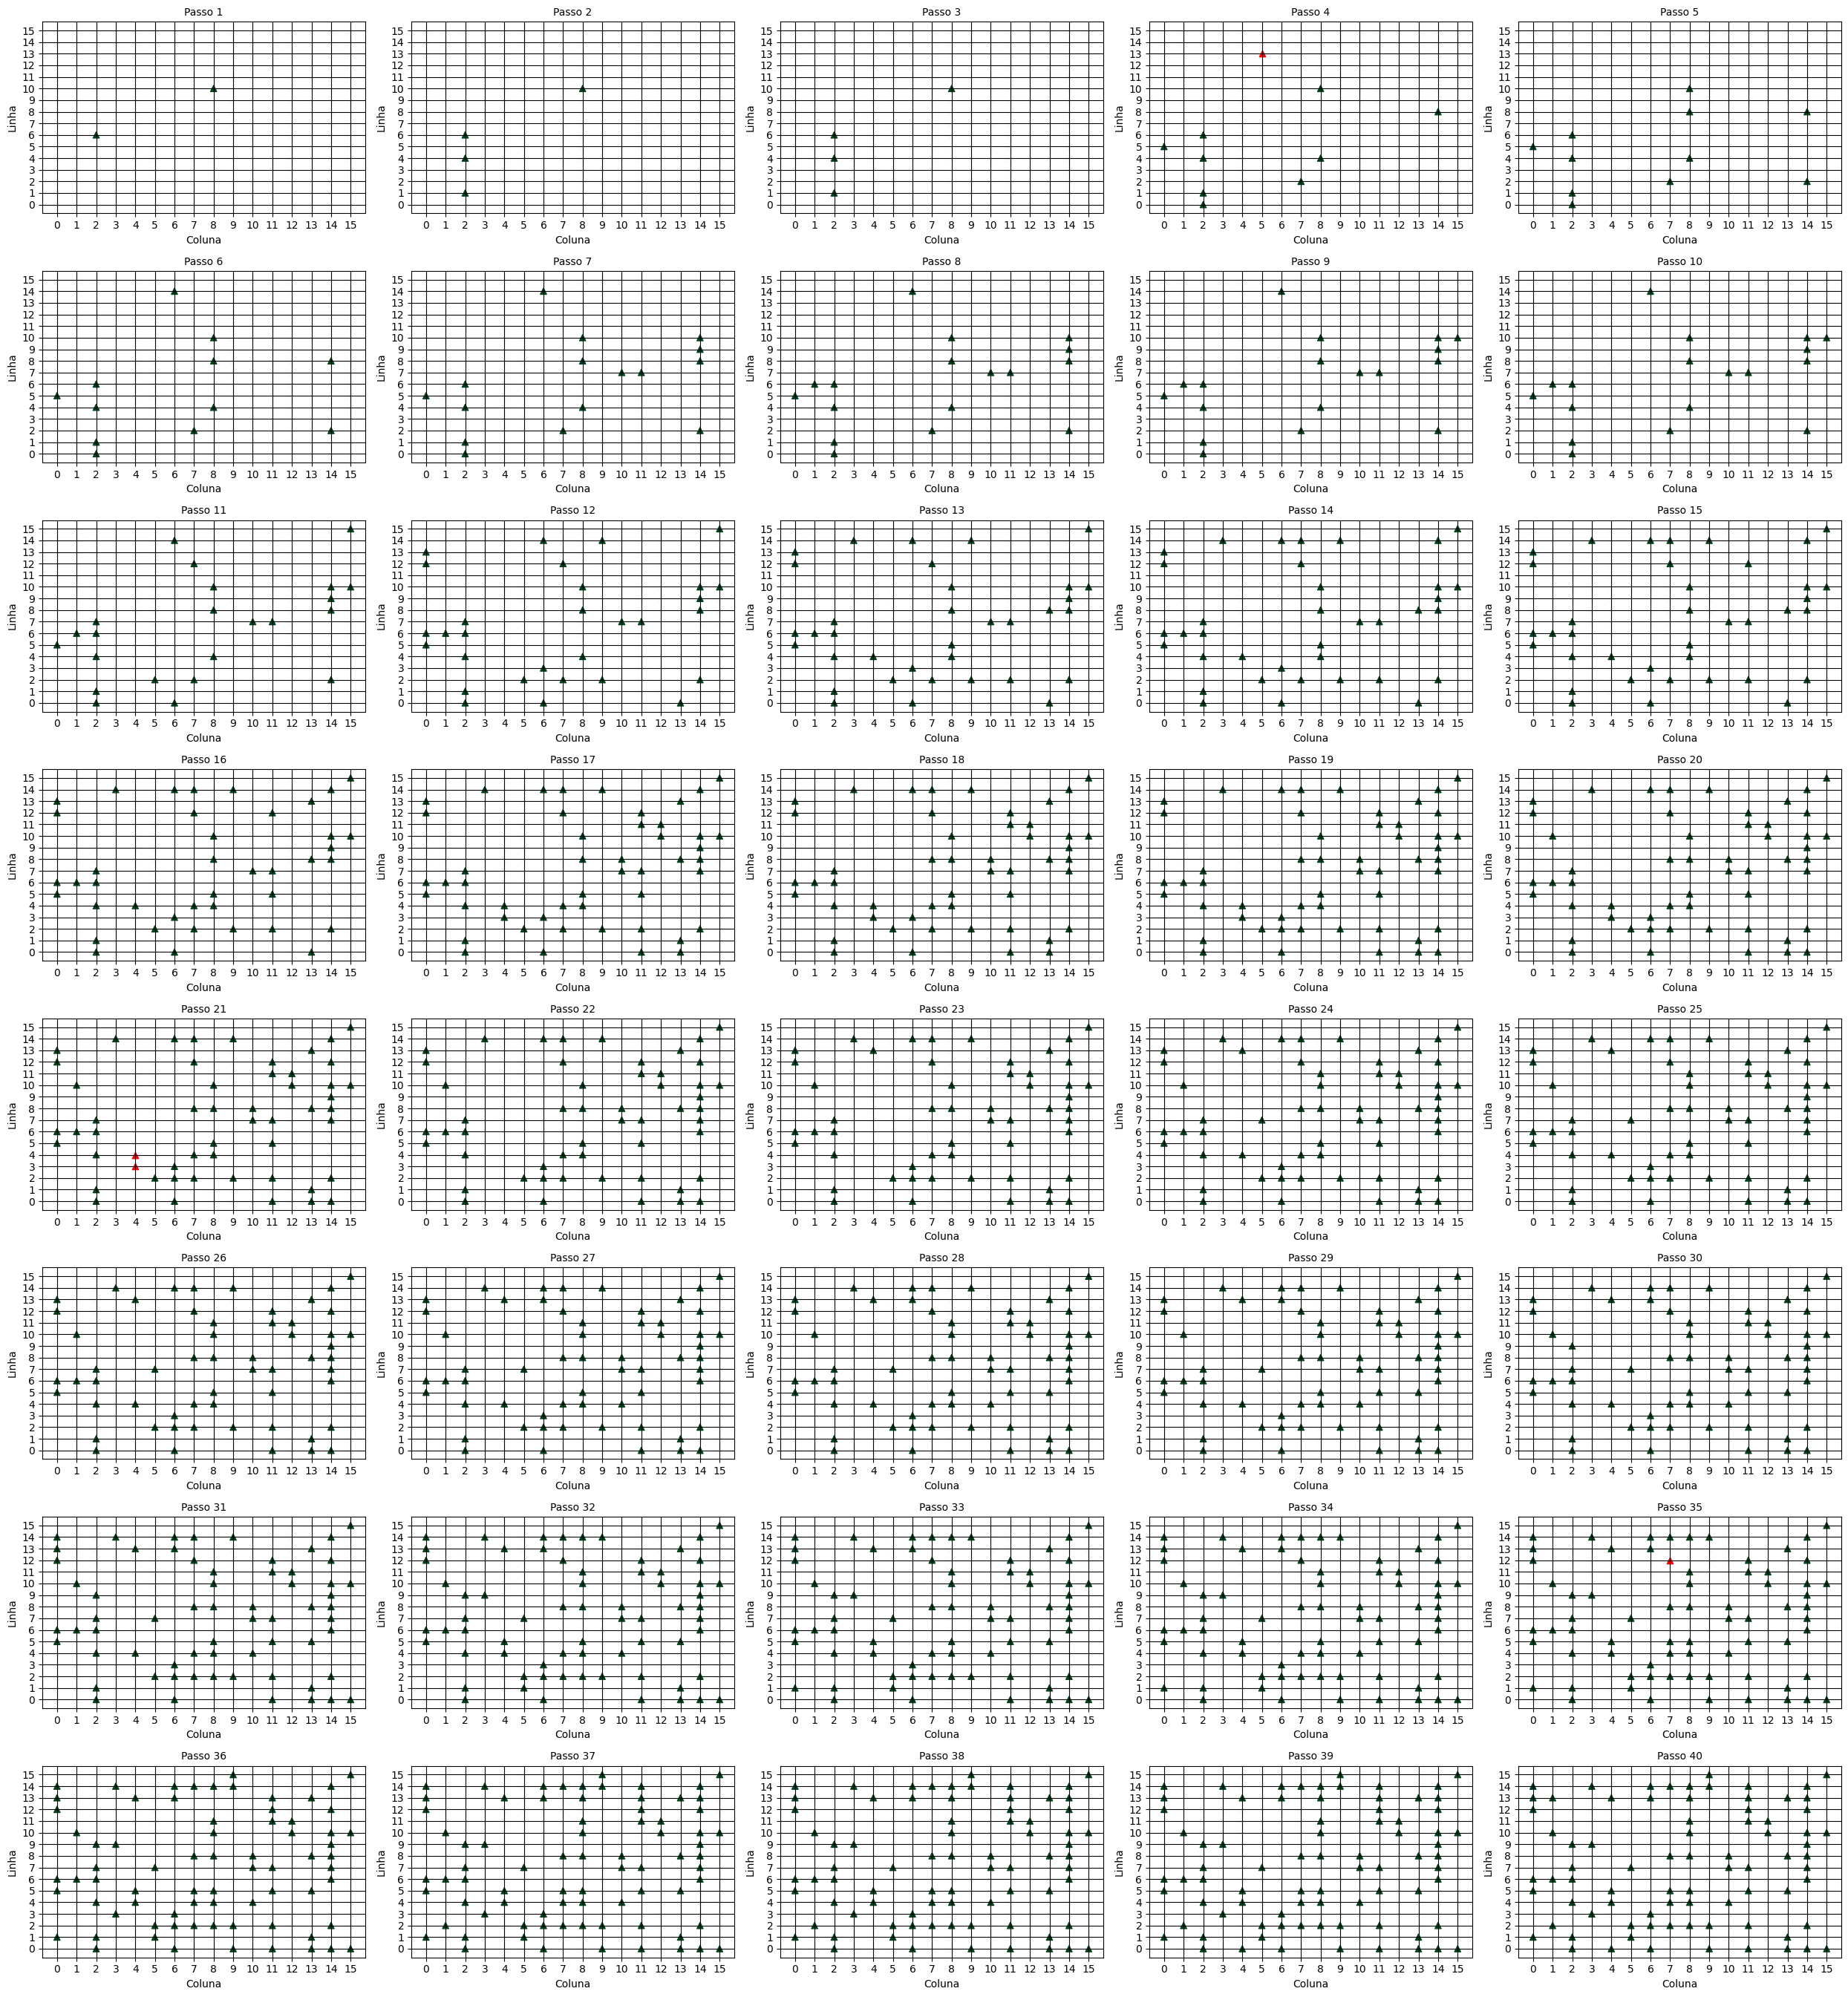

In [ ]:
simular1a(L=16, T=40, p=0.01, f=0.2)

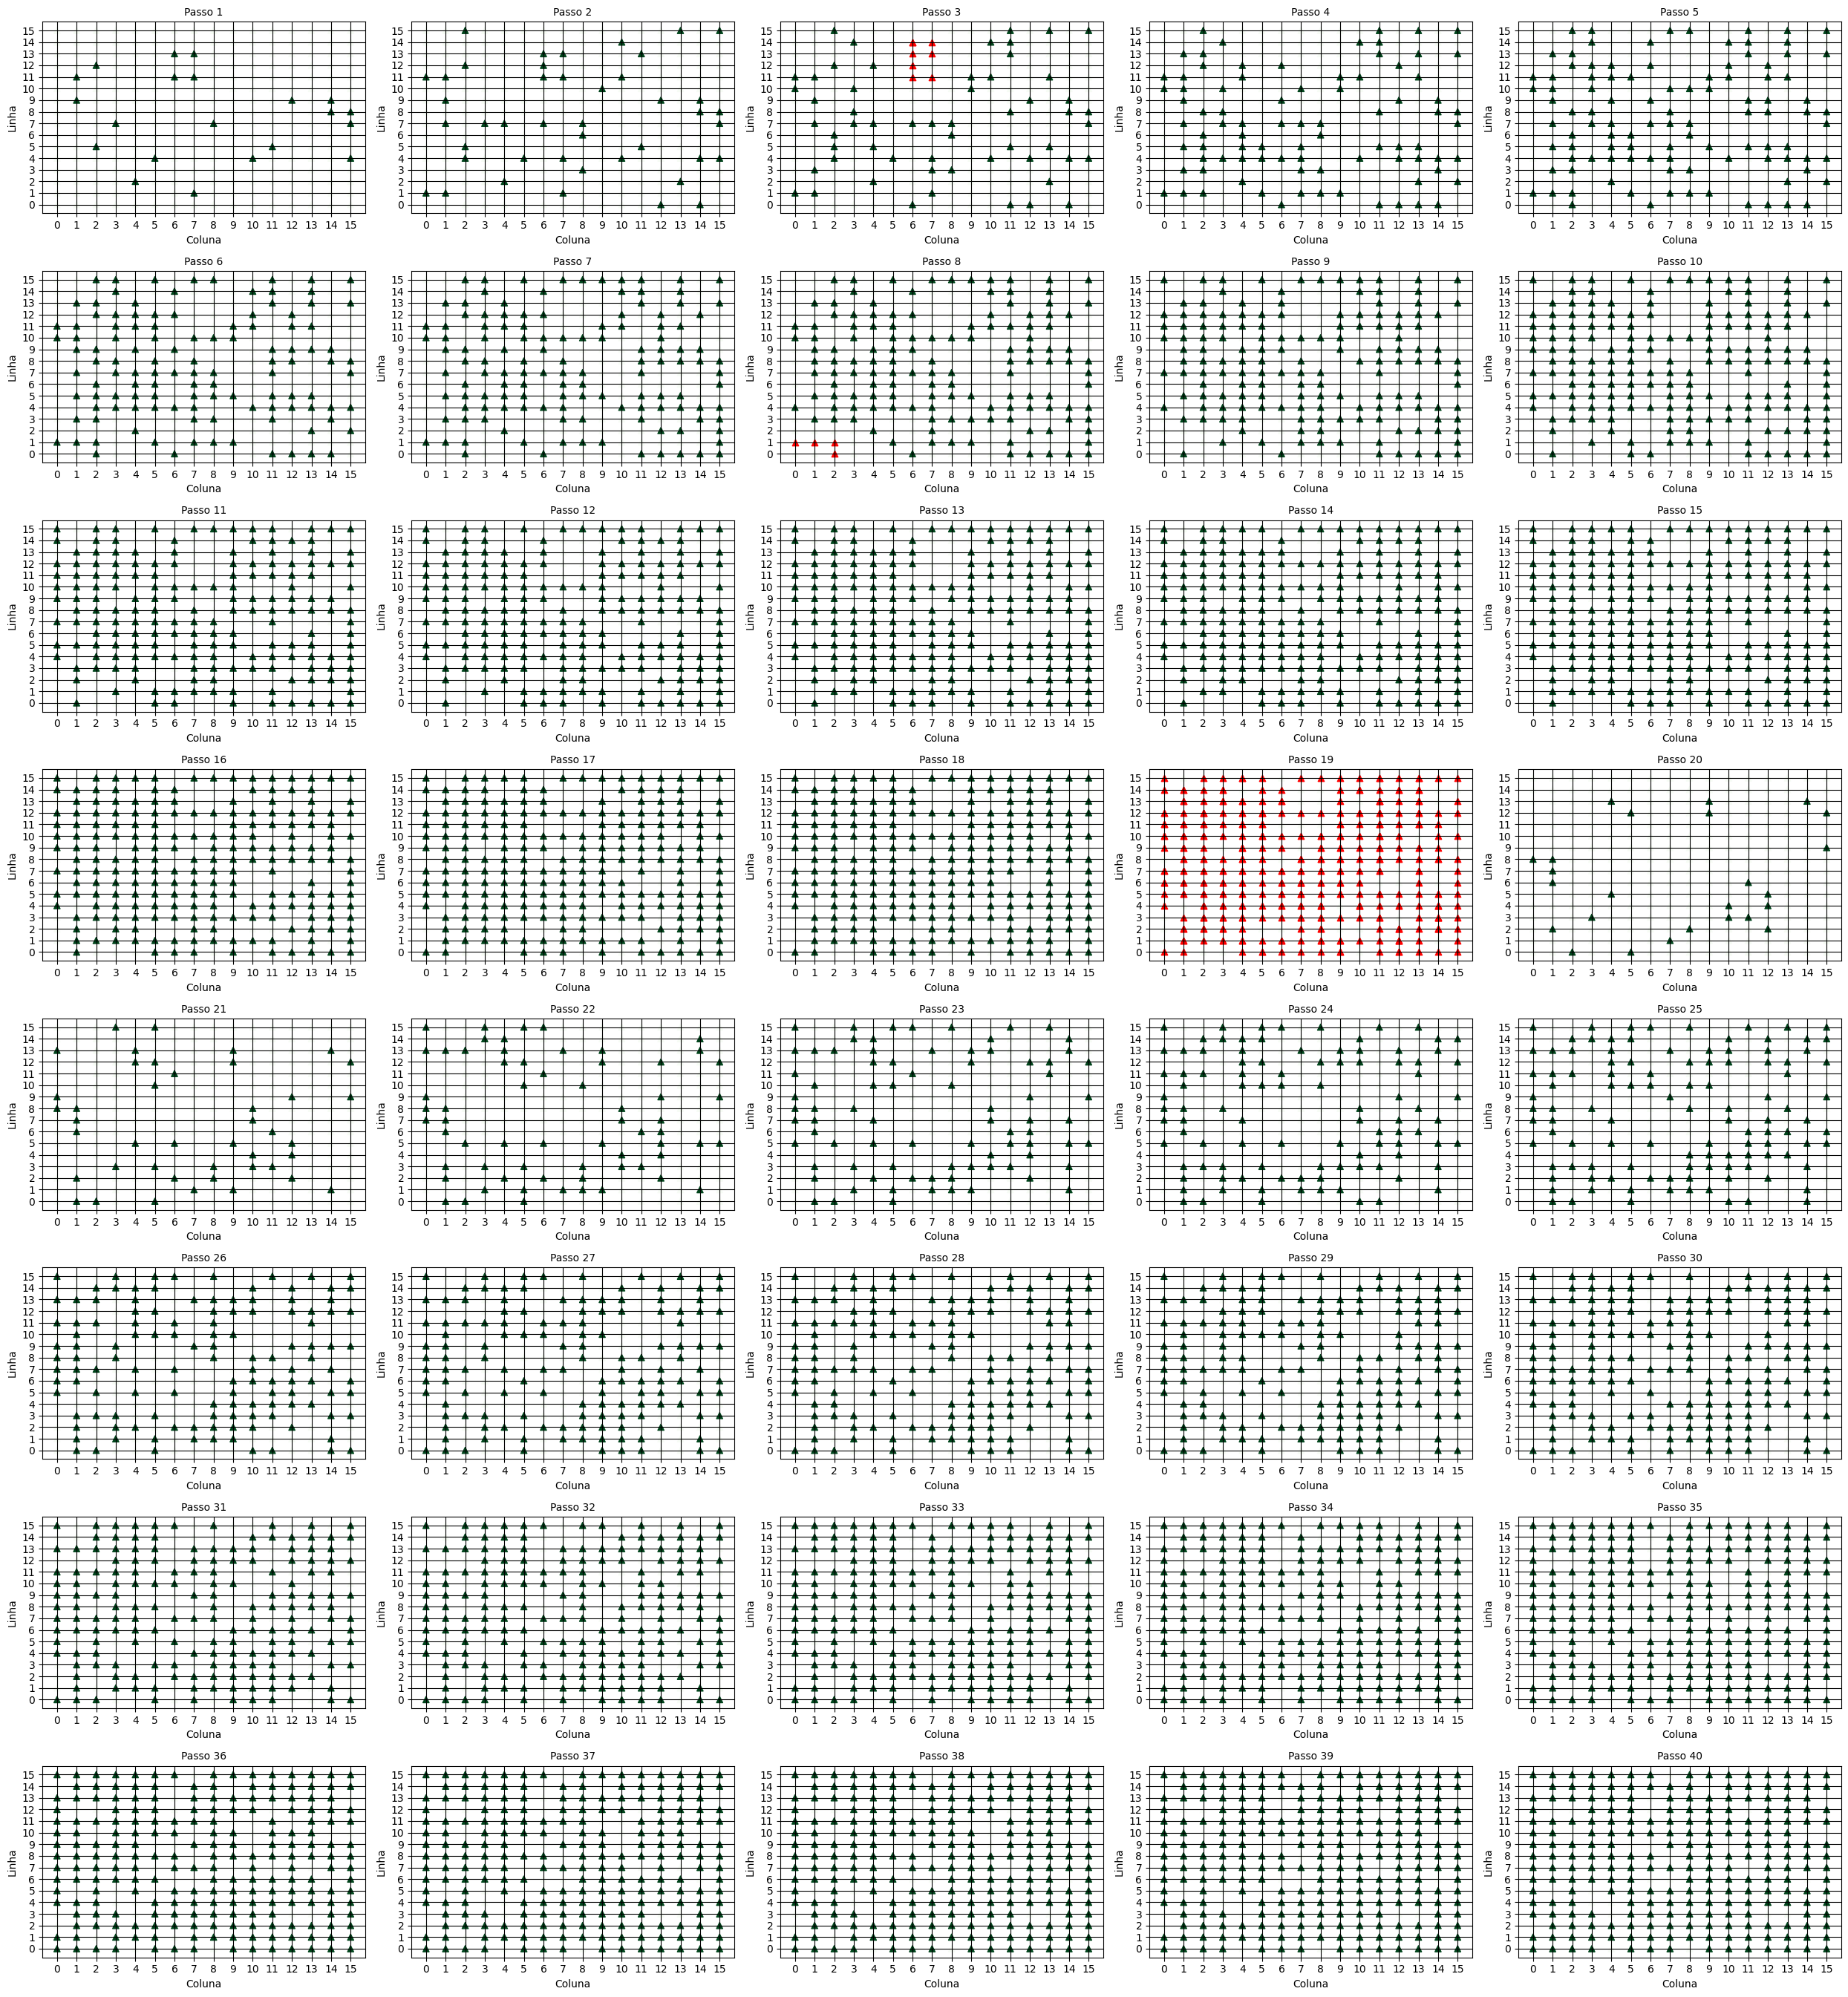

In [ ]:
simular1a(L=16, T=40, p=0.1, f=0.2)

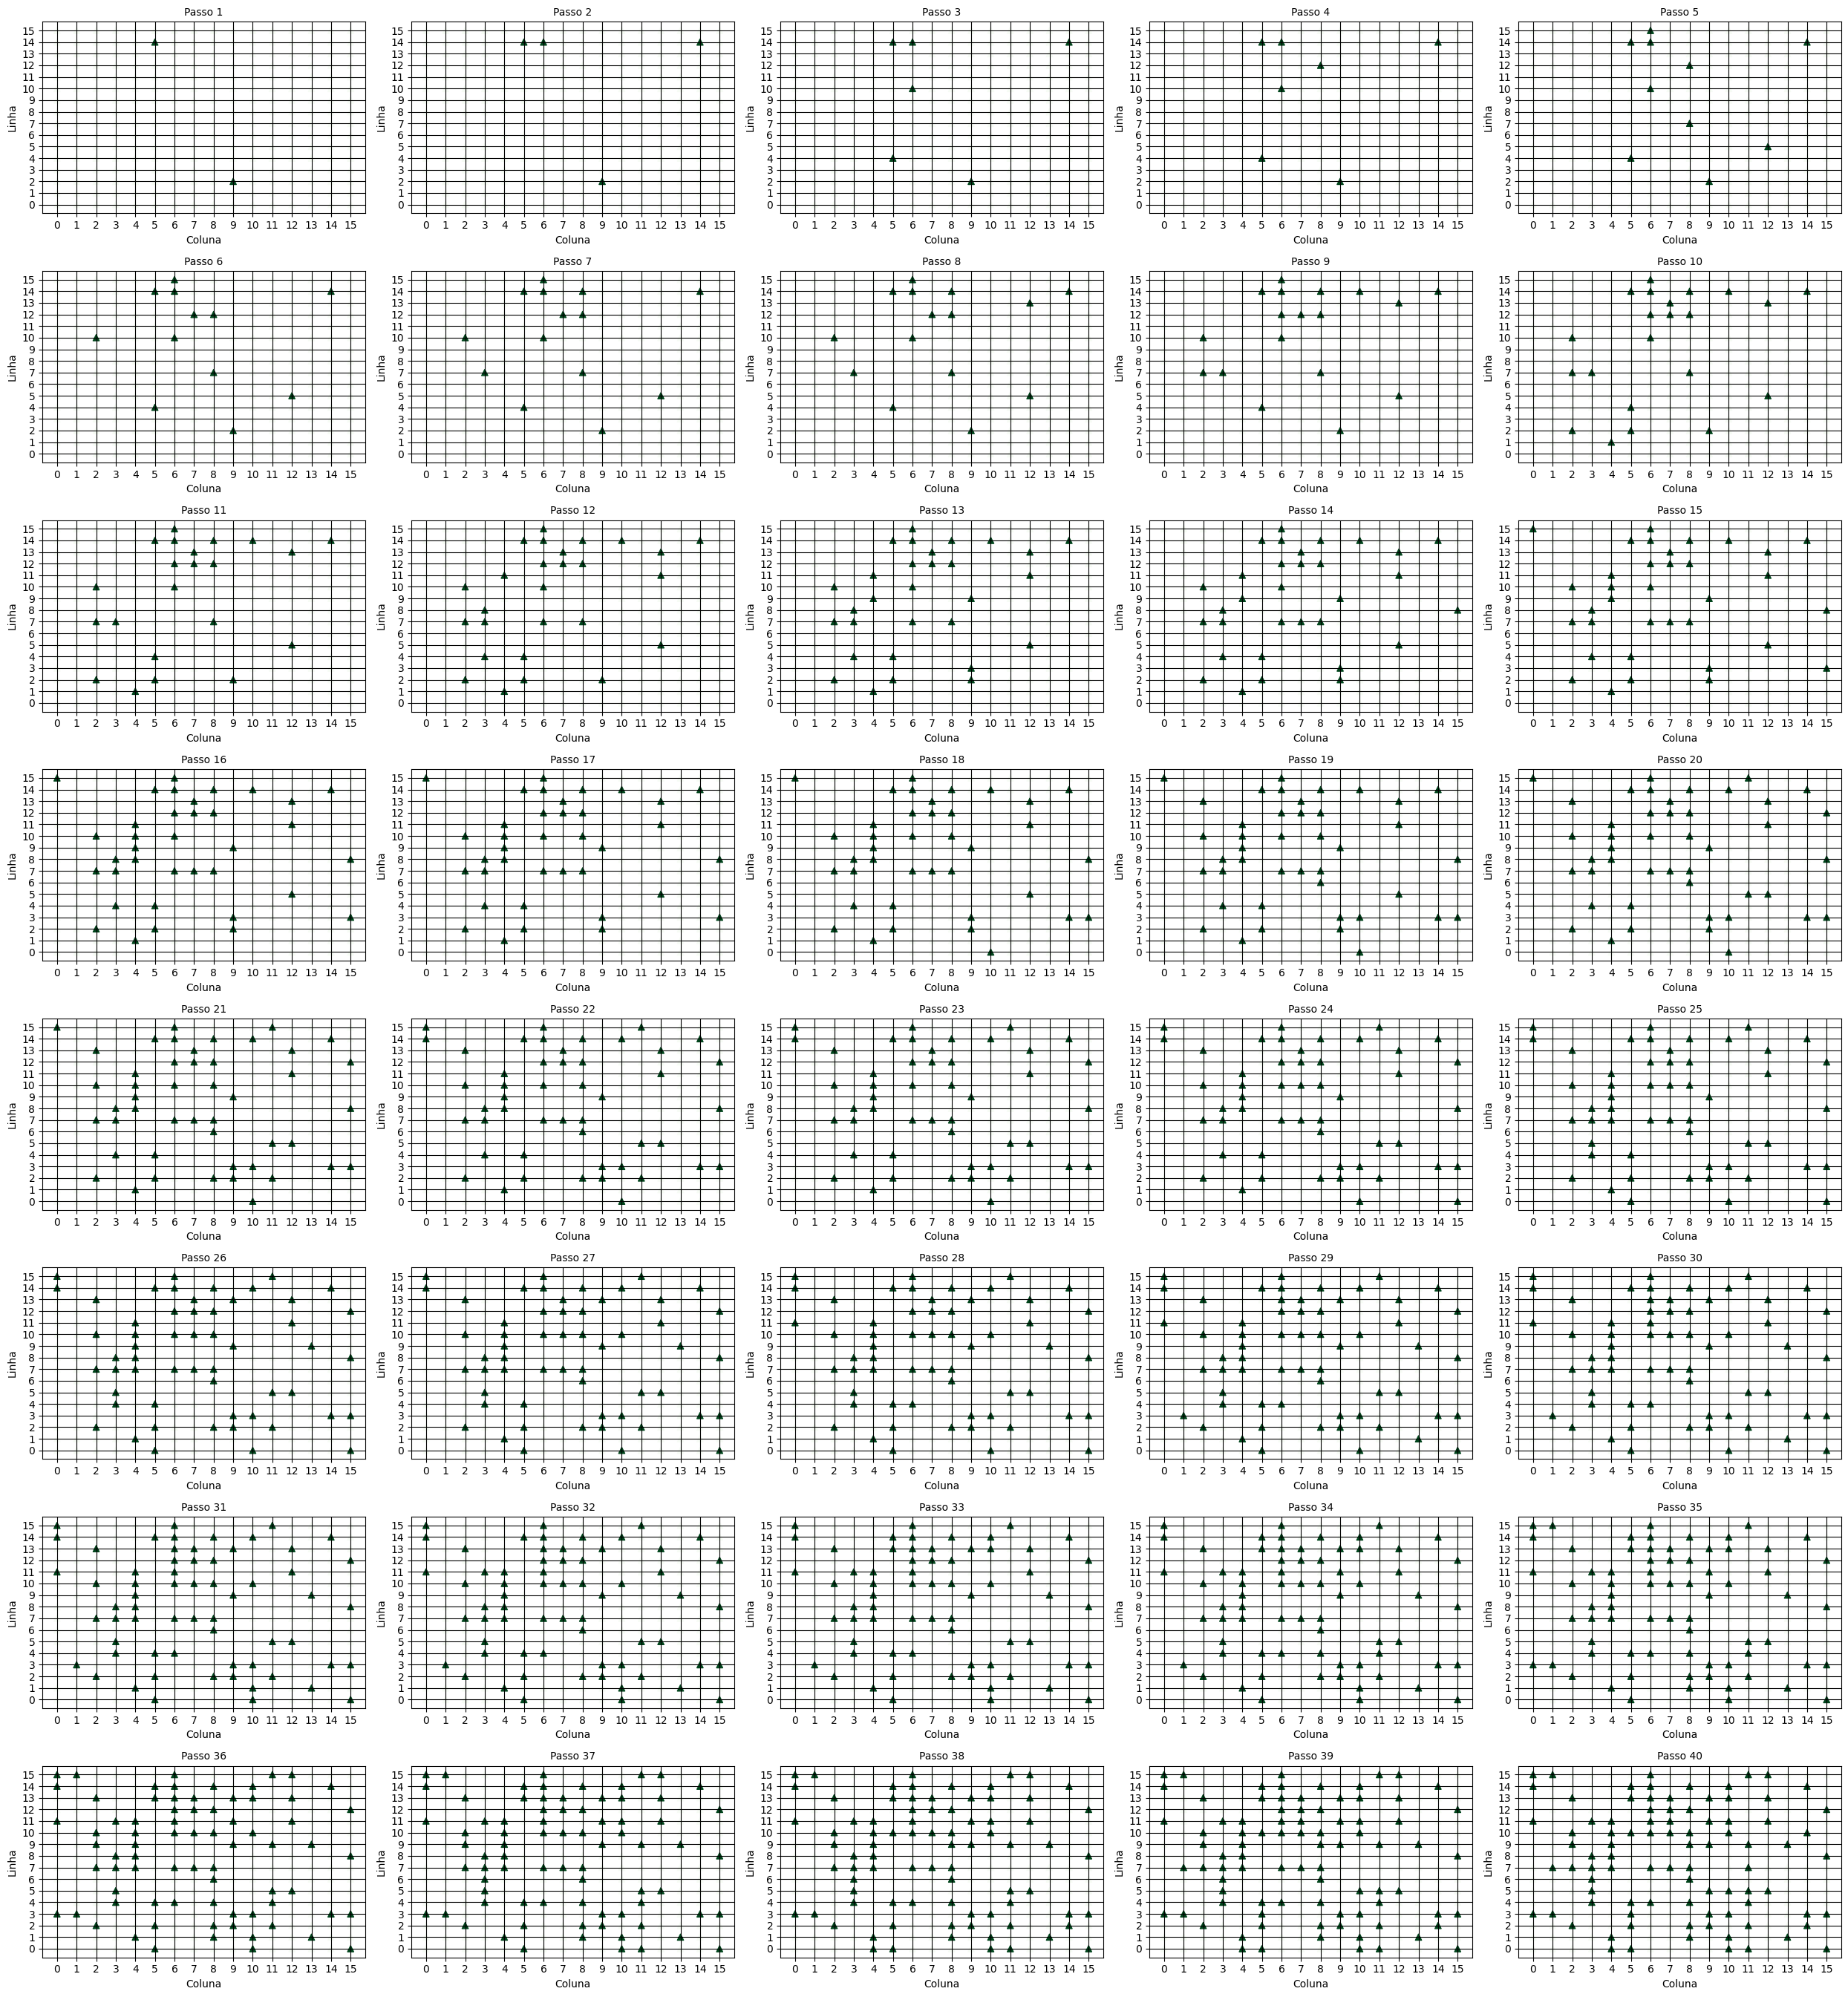

In [ ]:
simular1a(L=16, T=40, p=0.01, f=0.02)

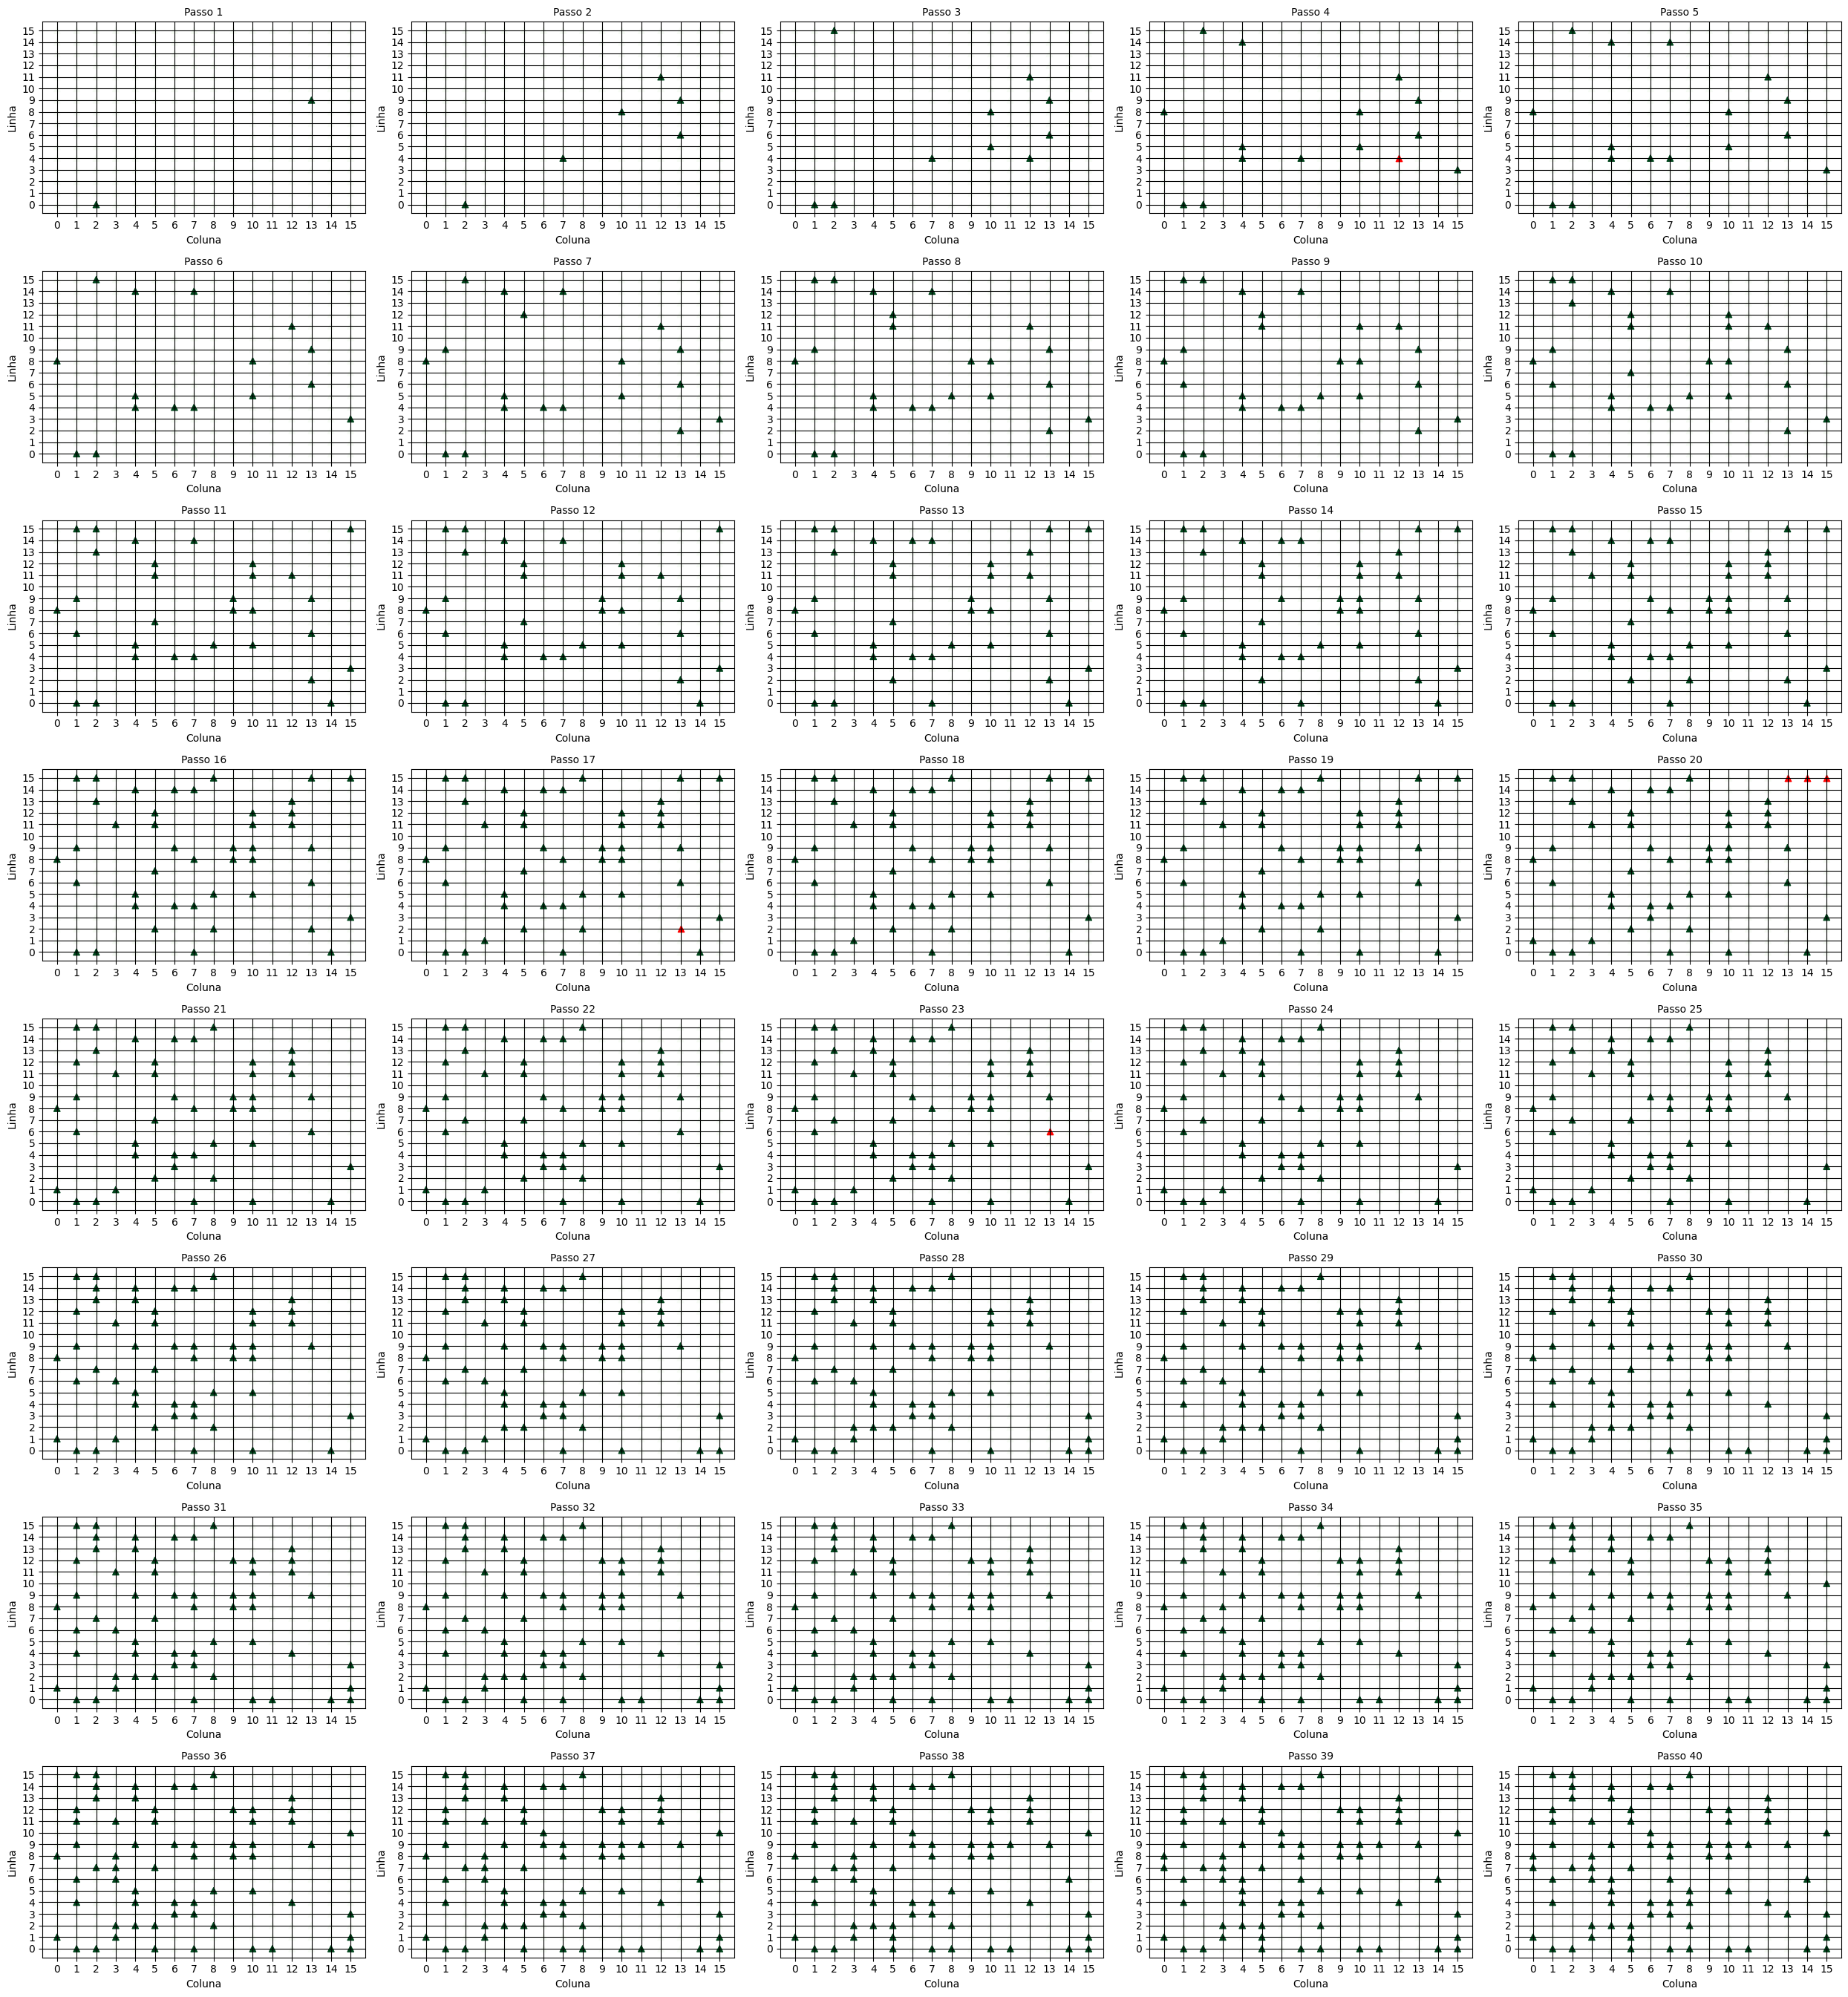

In [ ]:
simular1a(L=16, T=40, p=0.01, f=0.8)

Com p=0.01 e f =0.2 os incendios eram raros provavelmente porque quando ocorriam eram em lugares que não tinham árvores e quando ocorriam eram pequenos devido ao fato das árvores estarem bem espalhadas. Porém quando multiplicamos o p por 10 ficando com p=0.1 e f =0.2 as árvores se espalhava muito rapidamente de maneira que quando ocorriam incendios ele era muito grande. Ja quando p=0.01 e f =0.8 os raios eram mais frequentes de maneira que quando eles ocorriam queimavam muito poucas árvores visto que não tinha um tempo hábil da floresta crescer muito

# 1 C)

In [ ]:

def simular1c(L, T, p, f):
    floresta = np.zeros((L, L), dtype=int)
    tamanho_queimadas = []
    for _ in range(T):
        # Adicione crescimento e raio, conforme implementado
        crescimento(floresta, p)
        queimadas = raio(floresta, f)
        if len(queimadas) > 0:
            tamanho_queimadas.append(len(queimadas))
            print(len(queimadas))
    plt.figure(figsize=(10, 6))
    plt.hist(tamanho_queimadas)
    plt.xlabel('Número de árvores queimadas')
    plt.ylabel('Frequência')
    plt.title('Histograma do Tamanho das Queimadas')
    plt.show()

129606
128558
114878
99611
100186
73502
100296
73421
116
73523
99937
114752
122684
100055
99958
126523
114492
1
122694
130489
99485
114379
40
114524
122409
25
126639


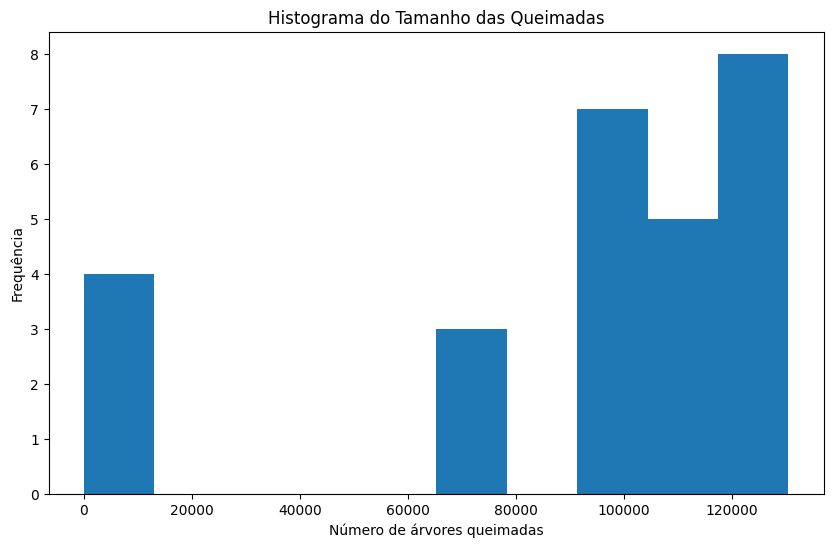

In [ ]:
simular1c(L=256, T=104, p=0.5, f=0.3)

Aumentando muito o lado do quadrado e a quantidade de iterações para p=0.5 e f=0.3 é perceptível que o ocorreram 25 incendios e eles variaram muito de tamanho, 4 deles menores que 160 e 21 maiores de 6000 mostrando que formaram-se clusters bem grandes.

# Parte 2

In [ ]:
def simular2(L, p, f):
    floresta = np.zeros((L, L), dtype=int)
    tamanho_queimadas = []
    incendios=0
    while incendios<5000:
        crescimento(floresta, p)
        queimadas = raio(floresta, f)
        if len(queimadas) > 0:
            tamanho_queimadas.append(len(queimadas))
            incendios+=1
    tamanho_queimadas = np.array(tamanho_queimadas)
    sizes = np.arange(1, L*L + 1)
    cCDF = np.zeros_like(sizes, dtype=float)
    for i, size in enumerate(sizes):
        cCDF[i] = np.sum(tamanho_queimadas >= size) / len(tamanho_queimadas)

    plt.figure(figsize=(10, 6))
    plt.loglog(sizes / (L * L), cCDF, marker='o', linestyle='-', markersize=4)
    plt.xlabel('Tamanho Relativo do Incêndio (n/L^2)')
    plt.ylabel('cCDF (C(n))')
    plt.title(f'cCDF para L={L}')
    plt.grid(True)
    plt.show()

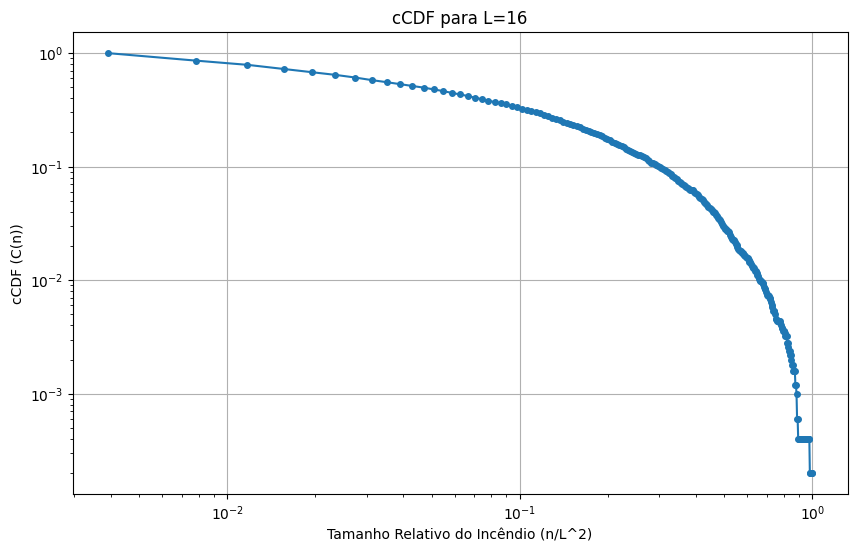

In [ ]:
simular2(L=16, p=0.01, f=0.2)

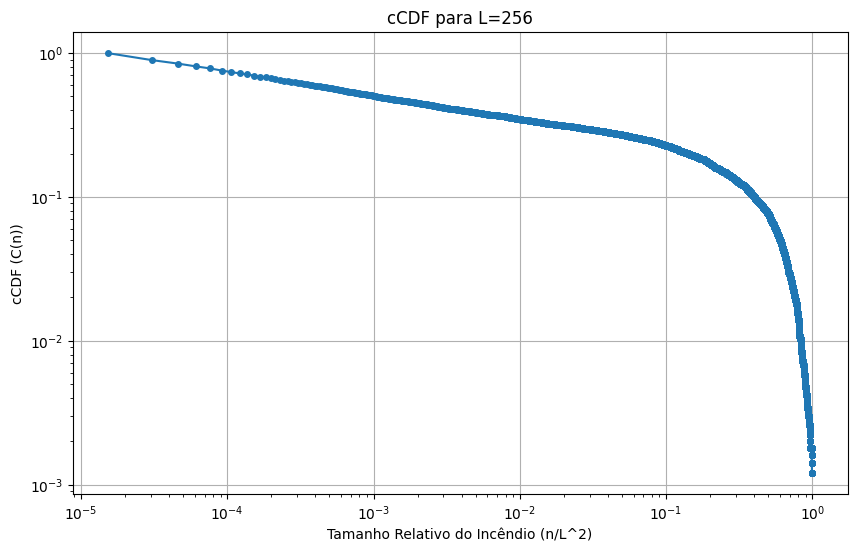

In [ ]:
simular2(L=256, p=0.01, f=0.2)

O comportamento linear da cCDF é uma evidência de que os incêndios florestais simulados seguem uma lei de potência para uma grande gama de tamanhos. No entanto, os efeitos de borda e o tamanho finito da floresta causam desvios nos extremos da distribuição. Ao aumentar L, a seção linear da curva se expande, reforçando a natureza da lei de potência em incêndios florestais, à medida que os efeitos de borda se tornam menos significativos. Essa análise reflete como o tamanho da floresta influencia a propagação dos incêndios e a forma da distribuição dos tamanhos dos incêndios, especialmente nos extremos da distribuição.

# Parte 3 A)

In [ ]:
def gera_floresta_aleatoria(L, num_arvores):
    floresta = inicializa_floresta(L)
    indices = np.random.choice(L * L, num_arvores, replace=False)
    np.put(floresta, indices, 1)
    return floresta

In [ ]:
def simular3(L, p, f,n_inc):
    floresta = inicializa_floresta(L)
    tamanho_queimadas = []
    tamanho_queimadas_aleatorias = []
    incendios = 0

    while incendios < n_inc:
        crescimento(floresta, p)
        queimadas = raio(floresta, f)
        if len(queimadas) > 0:
            tamanho_queimadas.append(len(queimadas))
            incendios += 1

            num_arvores = np.count_nonzero(floresta)
            floresta_aleatoria = gera_floresta_aleatoria(L, num_arvores)
            queimadas_aleatorias = raio(floresta_aleatoria, f)
            if len(queimadas_aleatorias) > 0:
                tamanho_queimadas_aleatorias.append(len(queimadas_aleatorias))

    tamanho_queimadas = np.array(tamanho_queimadas)
    tamanho_queimadas_aleatorias = np.array(tamanho_queimadas_aleatorias)

    sizes = np.arange(1, L*L + 1)
    cCDF_original = np.zeros_like(sizes, dtype=float)
    cCDF_aleatoria = np.zeros_like(sizes, dtype=float)

    for i, size in enumerate(sizes):
        cCDF_original[i] = np.sum(tamanho_queimadas >= size) / len(tamanho_queimadas)
        cCDF_aleatoria[i] = np.sum(tamanho_queimadas_aleatorias >= size) / len(tamanho_queimadas_aleatorias)

    plt.figure(figsize=(10, 6))
    plt.loglog(sizes / (L * L), cCDF_original, marker='o',  markersize=4, label='Floresta Original')
    plt.loglog(sizes / (L * L), cCDF_aleatoria, marker='s', markersize=4, label='Floresta Aleatória')
    plt.xlabel('Tamanho Relativo do Incêndio (n/L^2)')
    plt.ylabel('cCDF (C(n))')
    plt.title(f'cCDF para L={L}')
    plt.legend()
    plt.grid(True)
    plt.show()

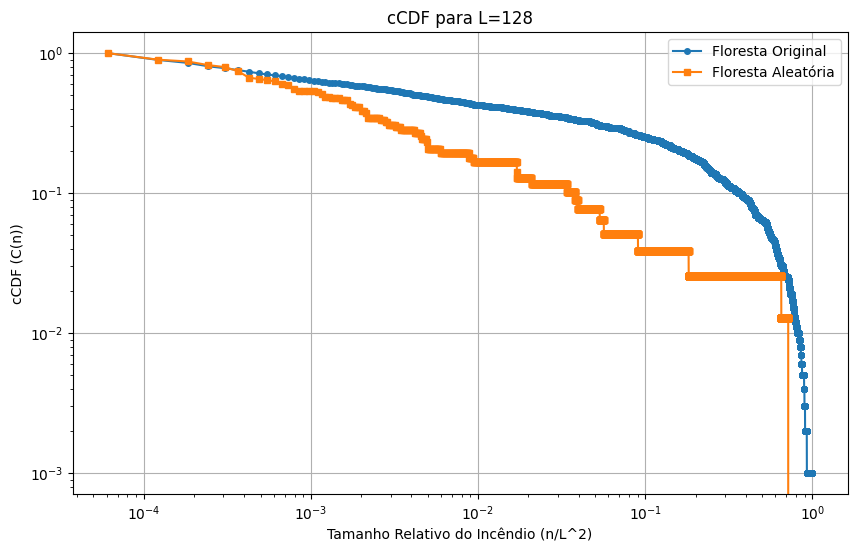

In [ ]:
simular3(128, 0.01, 0.2,1000)

A cCDF da Floresta Original (linha azul) segue um comportamento típico de lei de potência, como vimos nas análises anteriores. Há uma faixa linear em uma escala log-log, indicando que incêndios de diferentes tamanhos ocorrem com uma distribuição de probabilidade que decai de acordo com uma lei de potência. Em contraste, a Floresta Aleatória (linha laranja) mostra uma cCDF muito diferente. O comportamento da curva é mais "escalonado" e menos linear. Isso ocorre porque, na floresta aleatória, não há uma estrutura de vizinhança natural ou uma evolução dinâmica, o que resulta em incêndios com características diferentes dos incêndios em uma floresta que cresceu com incêndios.

# B)

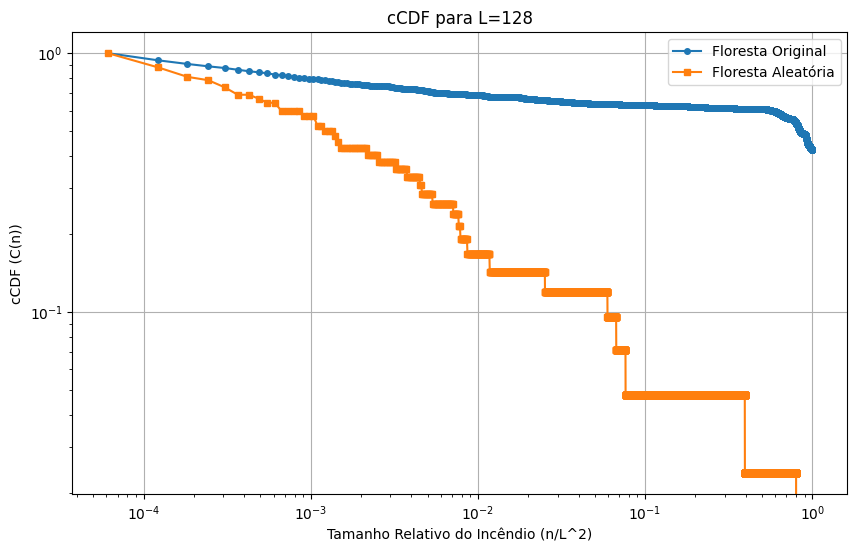

In [ ]:
simular3(128, 0.1, 0.2,1000)

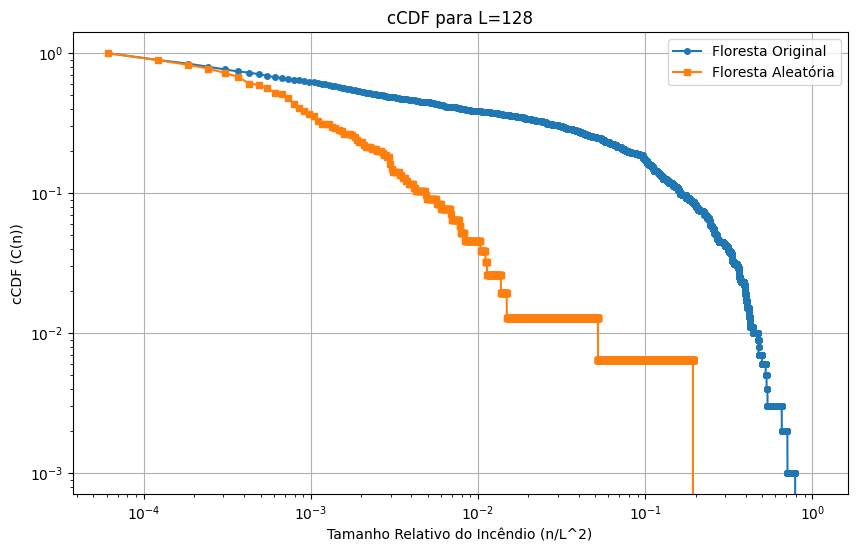

In [ ]:
simular3(128, 0.01, 0.4,1000)

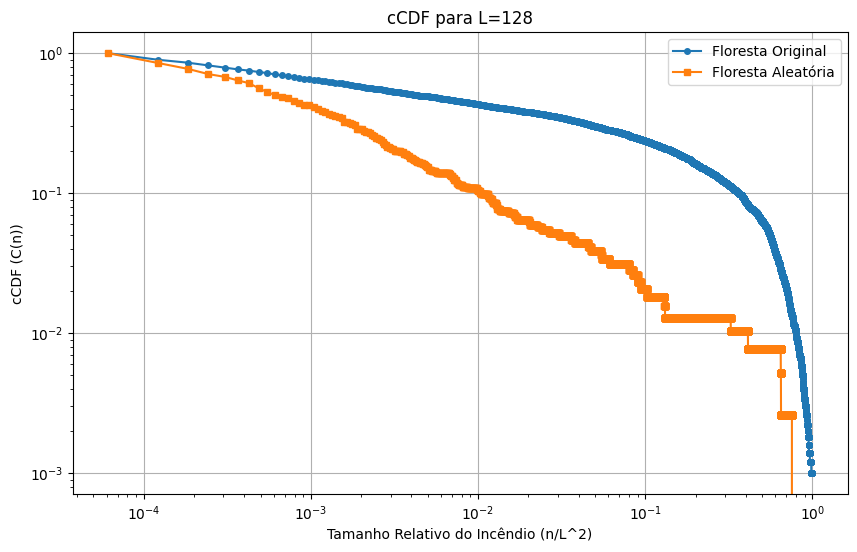

In [ ]:
simular3(128, 0.01, 0.2,5000)

No primeiro gráfico, com p=0.01 e f=0.2, observa-se que a curva da Floresta Original (em azul) se estende de maneira mais contínua ao longo do eixo dos tamanhos relativos dos incêndios, enquanto a curva da Floresta Aleatória (em laranja) apresenta uma queda mais brusca e não alcança os menores valores no eixo de tamanhos. Isso indica que a Floresta Original possui uma maior diversidade nos tamanhos dos incêndios, característica de sistemas que tendem à criticidade auto-organizada. Já a Floresta Aleatória exibe uma variação menor e tende a apresentar incêndios maiores e menos diversificados, sugerindo a ausência de uma estrutura bem definida na conectividade entre as árvores.

No segundo gráfico, com p=0.1 e f=0.2, o aumento da probabilidade de crescimento das árvores (p) faz com que a Floresta Original continue apresentando uma distribuição mais variada dos tamanhos dos incêndios em relação à Floresta Aleatória. No entanto, neste caso, a curva da Floresta Aleatória começa a se aproximar da curva da Floresta Original. Esse aumento em p torna a floresta mais densa, favorecendo uma maior conectividade entre as árvores. Mesmo na Floresta Aleatória, essa conectividade ampliada resulta em uma distribuição de incêndios mais abrangente, embora ainda menos diversificada do que na Floresta Original.

No terceiro gráfico, com p=0.01 e f=0.4, observa-se que, ao dobrar a frequência de raios (f), a curva da Floresta Original agora apresenta uma queda mais acentuada na região dos incêndios de maior escala, enquanto a curva da Floresta Aleatória mantém uma descida abrupta, porém menos variada. O aumento de f eleva a ocorrência de incêndios, dificultando a formação de grandes agrupamentos de árvores na Floresta Original e resultando em uma menor incidência de incêndios de grande porte. Ainda assim, a estrutura da Floresta Original continua favorecendo uma gama mais ampla de tamanhos de incêndios em comparação com a Floresta Aleatória.

No quarto gráfico, com p=0.01 e f=0.2 após 5000 raios, a curva da Floresta Original (em azul) mantém uma transição mais suave ao longo dos tamanhos relativos dos incêndios, contrastando com a curva da Floresta Aleatória (em laranja), que apresenta uma queda mais abrupta. Essa suavidade sugere uma maior diversidade nos tamanhos dos incêndios, característica de sistemas que se aproximam da criticidade auto-organizada. Já a Floresta Aleatória, apesar de exibir incêndios de diferentes tamanhos, possui uma distribuição mais limitada, com maior concentração de eventos de maior escala.

# Parte 4

# A)

In [ ]:
def simular4(L, p, f, n_steps):

    # Inicializa a floresta
    floresta = inicializa_floresta(L)
    fire_sizes = []

    # Loop de simulação
    for step in range(n_steps):
        # Crescimento das árvores na floresta
        crescimento(floresta, p)

        # Ocorrência de raio e início do incêndio
        queimadas = raio(floresta, f)

        # Se houve incêndio, armazena o tamanho
        if queimadas:
            fire_sizes.append(len(queimadas))

    return fire_sizes

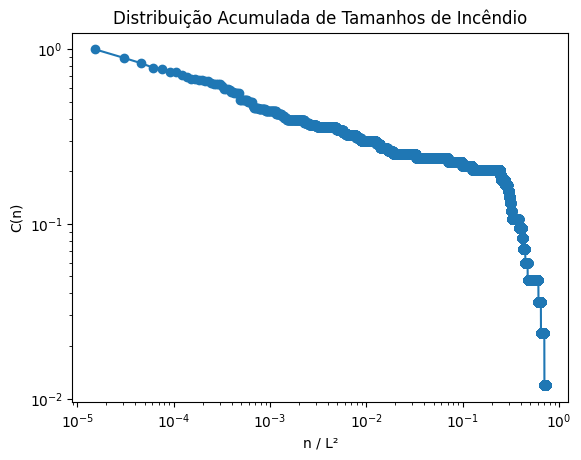

In [ ]:
fire_sizes=simular4(256,0.01,0.2,1000)
n_bins = np.arange(1, np.max(fire_sizes)+1)
cdf = [np.sum(fire_sizes >= size)/len(fire_sizes) for size in n_bins]

plt.plot(n_bins / 256**2, cdf, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n / L²')
plt.ylabel('C(n)')
plt.title('Distribuição Acumulada de Tamanhos de Incêndio')
plt.show()

# B)

In [ ]:
def linear_fit(x, a, b):
    return a * x + b

In [ ]:
def B_4(L):

    log_x = np.log(n_bins / L**2)
    log_y = np.log(cdf)
    initial_cut = np.where(log_x < -2)[0]

    popt, _ = curve_fit(linear_fit, log_x[initial_cut], log_y[initial_cut])
    beta = popt[0]
    alpha = 1 - beta

    plt.plot(log_x, log_y, marker='o', label='Dados')
    plt.plot(log_x, linear_fit(log_x, *popt), label=f'Ajuste linear: β = {beta:.2f}')
    plt.xlabel('log(n / L²)')
    plt.ylabel('log(C(n))')
    plt.title('Ajuste Linear da Distribuição de Incêndios')
    plt.legend()
    plt.show()

    print(f'Expoente α estimado: {alpha:.2f}')

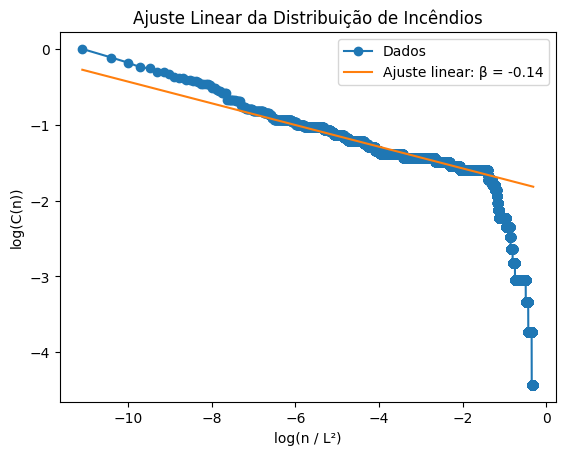

Expoente α estimado: 1.14


In [ ]:
B_4(256)#,0.01,0.2,1000)

# C)


O valor estimado para o expoente α=1.18 está bastante próximo do valor de referência encontrado na literatura, α=1.15. Essa proximidade indica que o comportamento da nossa simulação está alinhado com os resultados teóricos esperados para distribuições que seguem uma lei de potência. Diferenças sutis podem surgir devido a diversos fatores, como o número de iterações da simulação, o tamanho da floresta (L) ou a escolha da faixa de ajuste da distribuição, especialmente na região inicial, onde a lei de potência se manifesta com mais clareza.

# D)

In [ ]:
def calcular_alpha(L, p, f, n_steps):
    fire_sizes = simular4(L, p, f, n_steps)

    n_bins = np.arange(1, np.max(fire_sizes)+1)
    cdf = [np.sum(fire_sizes >= size) / len(fire_sizes) for size in n_bins]

    plt.plot(n_bins / L**2, cdf, marker='o', label=f'p={p}, f={f}')
    plt.xscale('log')
    plt.yscale('log')

    log_x = np.log(n_bins / L**2)
    log_y = np.log(cdf)
    initial_cut = np.where(log_x < -2)[0]

    popt, _ = curve_fit(linear_fit, log_x[initial_cut], log_y[initial_cut])
    beta = popt[0]
    alpha = 1 - beta

    print(f'Para p={p}, f={f}, o expoente α estimado é: {alpha:.2f}')

    return alpha

Para p=0.1, f=0.2, o expoente α estimado é: 1.03
Para p=0.01, f=0.4, o expoente α estimado é: 1.30


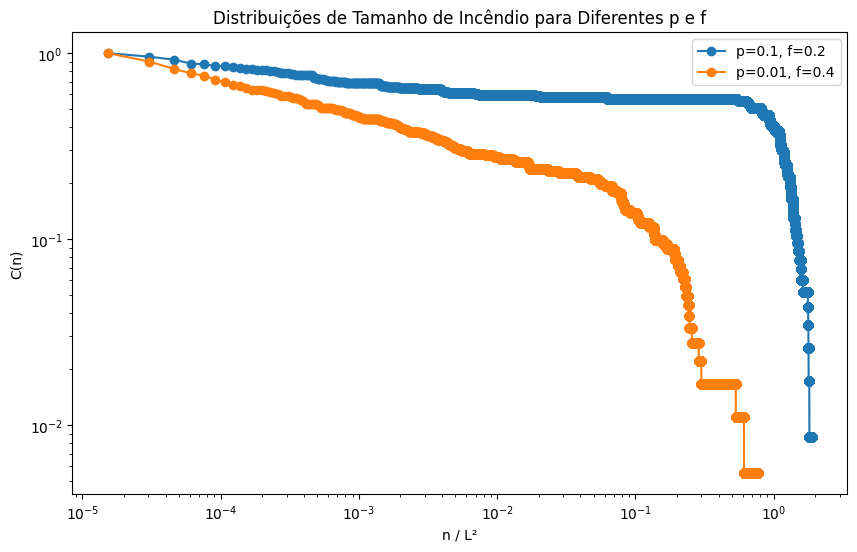

In [ ]:
plt.figure(figsize=(10, 6))

alpha1 = calcular_alpha(256,0.1,0.2,1000)

alpha2 = calcular_alpha(256,0.01,0.4,1000)

plt.xlabel('n / L²')
plt.ylabel('C(n)')
plt.title('Distribuições de Tamanho de Incêndio para Diferentes p e f')
plt.legend()
plt.show()

No primeiro cenário, com p=0.1 e f=0.2, o valor estimado de α foi de 1.03, indicando que o sistema opera em um regime próximo ao comportamento crítico, característico de distribuições de lei de potência. Nesse contexto, a taxa de crescimento das árvores é moderada, resultando na formação de agrupamentos de diferentes tamanhos. Um valor de α próximo de 1 sugere a coexistência de incêndios pequenos e grandes, embora haja uma leve predominância dos eventos de menor escala. Esse regime é típico de sistemas próximos ao ponto crítico, onde tanto grandes quanto pequenas flutuações ocorrem de forma equilibrada.

No segundo cenário, com p=0.01 e f=0.4, a baixa densidade florestal aliada à alta frequência de raios faz com que o sistema seja amplamente dominado por incêndios pequenos. O valor de α=1.18 indica uma forte tendência para a ocorrência de eventos de queima de menor escala, refletindo um ambiente onde perturbações frequentes impedem a formação de grandes agrupamentos de árvores .